## **Name:** Atharv Gupta

## **Computing ID:** xur8hs

used ChatGPT 4o

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier

!pip install lime
from lime import lime_tabular
from sklearn.inspection import permutation_importance

# Below is a new package needed for this lab
!pip install ucimlrepo
from ucimlrepo import fetch_ucirepo

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 4.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=69923acc8ab3f556a0fad2f4e4dbedd09d2e160d2472c600b6d8f3159af5c8dd
  Stored in directory: /root/.cache/pip/wheels/85/fa/a3/9c2d44c9f3cd77cf4e533b58900b2bf4487f2a17e8ec212a3d
Successfully built lime


# Lab 3: Decision Trees and Random Forests (100 Points)

The goal of this lab is to optimize Decision Tree and Random Forest models using the provided dataset on census level data. Your goal is to build a Random Forest Classifier to be able to predict income levels above or below 50k.

The guidance this week is less prescriptive in terms of steps, so use the skills you have gained over the semester to build and evaluate your models. You will be graded on your model building, interpretation of the results and explanation of model selection. As always, you are welcome to rely on your classmates but submit your own code. Lastly, there are likely several correct approaches involving a variety of different conclusions, just make sure your conclusions are supported by your approach.


The dataset should be familiar as it's the census data, on 48,000+ individuals with a variety of variables and a target variable for above or below 50k in salary.

![](https://www.coopercenter.org/sites/default/files/styles/wide/public/wordpress_import/Figure1CesnsuBlog2-1024x512_0.png?itok=DwYqkfFm)

Look through the data dictionary at its source link: https://archive.ics.uci.edu/ml/datasets/Adult

# **Part 1: Data Preparation and EDA (15 points)**

In a text cell, answer the following exploratory questions and support your observations with any code, if needed.

## **Question 1 (2 points):**
## Read in the features (X) as a Pandas DataFrame. Show the first 5 rows of the features. How many rows do you have?



In [2]:
# Fetch dataset
adult = fetch_ucirepo(id=2)

X = adult.data.features
y = adult.data.targets

In [3]:
X=pd.DataFrame(X)

In [4]:
X.head(5)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba


In [5]:
X.shape

(48842, 14)

**There is a total of 48842 rows**

In [6]:
y=pd.DataFrame(y)

In [7]:
y.shape

(48842, 1)

## **Question 2 (2 points):**
## Are there any potential issues in the data or target that need to be corrected? Why are they issues? What specific method would you use to correct them and why?

## Consider using code and reading the data description (https://archive.ics.uci.edu/dataset/2/adult) to explore:

*   Assumptions and ranges of collected data
*   Missing values (impute? drop?)
*   Numerical data types represented as strings
*   Encoding categorical data appropriately
*   Normalization
*   Standardization

## You will not need to consider feature imbalances or sampling in part 1 or 2 of the lab.

In [8]:
X.dtypes

,0
age,int64
workclass,object
fnlwgt,int64
education,object
education-num,int64
marital-status,object
occupation,object
relationship,object
race,object
sex,object


In [9]:
missing_counts = X.isnull().sum()
print(missing_counts)
print(X.shape)

age                 0
workclass         963
fnlwgt              0
education           0
education-num       0
marital-status      0
occupation        966
relationship        0
race                0
sex                 0
capital-gain        0
capital-loss        0
hours-per-week      0
native-country    274
dtype: int64
(48842, 14)


In [10]:
print(((966+1843)*100)/48842)

5.751197739650301


In [11]:
X['occupation'].value_counts()

,count
occupation,
Prof-specialty,6172
Craft-repair,6112
Exec-managerial,6086
Adm-clerical,5611
Sales,5504
Other-service,4923
Machine-op-inspct,3022
Transport-moving,2355
Handlers-cleaners,2072


In [12]:
X['native-country'].value_counts()

,count
native-country,
United-States,43832
Mexico,951
?,583
Philippines,295
Germany,206
Puerto-Rico,184
Canada,182
El-Salvador,155
India,151


**Potential Issues:** Potential issues I've identified are that there is missing data in some of the features such as occupation and workclass (looked through the data description). Sex is an object when it can be denoted as a binary (0,1) variable. We don't need to normalize or standardize features for Decision Trees. Apart from NaNs, I also encountered a bunch of ?s.

## **Question 3 (6 points):**
## Preprocess the data according to the issues and correction methods you've identified. Save the new features and target variable (if necessary) as X_clean and y_clean.

for X: To deal with the missing data or ?s, I will impute with the mode (as that works best in this case of categorical data)

In [13]:

# Replace '?' strings with NaN
X.replace('?', np.nan, inplace=True)





In [14]:
num_cols = X.select_dtypes(include=['number']).columns

cat_cols=list(set(X.columns)-set(num_cols))

In [15]:
num_cols

Index(['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss',
       'hours-per-week'],
      dtype='object')

In [16]:
cat_cols

['race',
 'workclass',
 'relationship',
 'education',
 'sex',
 'marital-status',
 'occupation',
 'native-country']

In [17]:
from sklearn.impute import SimpleImputer

# Create imputer with strategy = 'most_frequent'
mode_imputer = SimpleImputer(strategy='most_frequent')

# Impute only the categorical columns
X[cat_cols] = mode_imputer.fit_transform(X[cat_cols])


now checking if any NaNs exist


In [18]:
missing_counts = X.isnull().sum()
print(missing_counts)

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
dtype: int64


cleaning the target feature

In [19]:
y.value_counts()

,count
income,
<=50K,24720
<=50K.,12435
>50K,7841
>50K.,3846


In [20]:
#got this code from lecture
y.loc[y['income'].str.contains('<',regex=False),'income']="<50K"
y.loc[y['income'].str.contains('>',regex=False),'income']=">=50K"

In [21]:
X_encoded = pd.get_dummies(X, columns=cat_cols, drop_first=True)


In [22]:
y.value_counts()

,count
income,
<50K,37155
>=50K,11687


In [23]:
X_clean=X_encoded.copy()
y_clean=y.copy()

## **Question 4 (5 points):**
## Create 2 versions of y_clean to create a new target response of whether income is above or below $50,000 for classification.

1.   **y_clean_binary:** Recode y_clean to be 1 if the target is over or equal to 50,000
2.   **y_clean_string:** Recode y_clean to be "Above or Equal" if the target is over or equal to 50,000 and "Below" if under.



In [24]:
print(type(y_clean))


<class 'pandas.core.frame.DataFrame'>


In [25]:

y_col = y_clean['income']

y_clean_binary = y_col.apply(lambda x: 1 if x == '>=50K' else 0)
y_clean_string = y_col.apply(lambda x: 'Above or Equal' if x == '>=50K' else 'Below')


In [26]:
print(y_clean_binary)
print(y_clean_string)

0        0
1        0
2        0
3        0
4        0
        ..
48837    0
48838    0
48839    0
48840    0
48841    1
Name: income, Length: 48842, dtype: int64
0                 Below
1                 Below
2                 Below
3                 Below
4                 Below
              ...      
48837             Below
48838             Below
48839             Below
48840             Below
48841    Above or Equal
Name: income, Length: 48842, dtype: object


# **Part 2: Decision Tree Pruning, Tuning and Evaluation (30 Points)**

## **Question 1 (5 points):**
## Create a function to take in a feature variable (X) and (y). In this function, create a train test split with a random seed of 3001.

## Use a vanilla decision tree model to fit the model on the train set and predict on the test set. Print the precision, recall, and accuracy of the model after prediction.

## Test that your function runs on both y_clean_binary and y_clean_string. For any of the following questions, you may use whichever y_clean variable you'd like.


In [27]:
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, mean_absolute_error


In [28]:
# Splitting the dataset
X_train_census, X_test_census, y_train_census, y_test_census = train_test_split(X_clean, y_clean_binary, test_size=0.2, random_state=3001) # use the train_test_split to split data into train and test sets, X is the features I'll use, y is the feature I'll predict

In [29]:
from sklearn.metrics import precision_score, recall_score, accuracy_score

In [30]:
# No tuning, using y_clean_binary
tree_census = DecisionTreeClassifier(criterion='gini', random_state=3001)
tree_census.fit(X_train_census, y_train_census)

y_pred_census = tree_census.predict(X_test_census)
precision_census=precision_score(y_test_census, y_pred_census)
recall_census=recall_score(y_test_census, y_pred_census)
accuracy_census= accuracy_score(y_test_census, y_pred_census)



print("Precision:", precision_census)
print("Recall:", recall_census)
print("Accuracy:", accuracy_census)

Precision: 0.6116052520118593
Recall: 0.6237580993520518
Accuracy: 0.8169720544579793


In [31]:
#using y_clean_string
X_train_census_2, X_test_census_2, y_train_census_2, y_test_census_2 = train_test_split(X_clean, y_clean_string, test_size=0.2, random_state=3001) # use the train_test_split to split data into train and test sets, X is the features I'll use, y is the feature I'll predict

In [32]:
# No tuning, using y_clean_binary
tree_census_2 = DecisionTreeClassifier(criterion='gini', random_state=3001)
tree_census_2.fit(X_train_census_2, y_train_census_2)

y_pred_census_2 = tree_census_2.predict(X_test_census_2)
precision_census_2 = precision_score(y_test_census_2, y_pred_census_2, pos_label='Above or Equal')
recall_census_2 = recall_score(y_test_census_2, y_pred_census_2, pos_label='Above or Equal')
accuracy_census_2= accuracy_score(y_test_census_2, y_pred_census_2)



print("Precision:", precision_census_2)
print("Recall:", recall_census_2)
print("Accuracy:", accuracy_census_2)

Precision: 0.6116052520118593
Recall: 0.6237580993520518
Accuracy: 0.8169720544579793


## **Question 2 (5 points):**
## Adjust your function to include some plotting features. After your prediction code, plot:

1.   A visualization of the resulting decision tree
2.   A confusion matrix of the results

## Your tree might be overwhelming or very large! If it is too large to be interpreted, constrain the max_depth parameter manually to 5 or less.

In [33]:
tree_census_v1 = DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=3001)
tree_census_v1.fit(X_train_census, y_train_census)


DecisionTreeClassifier(max_depth=5, random_state=3001)

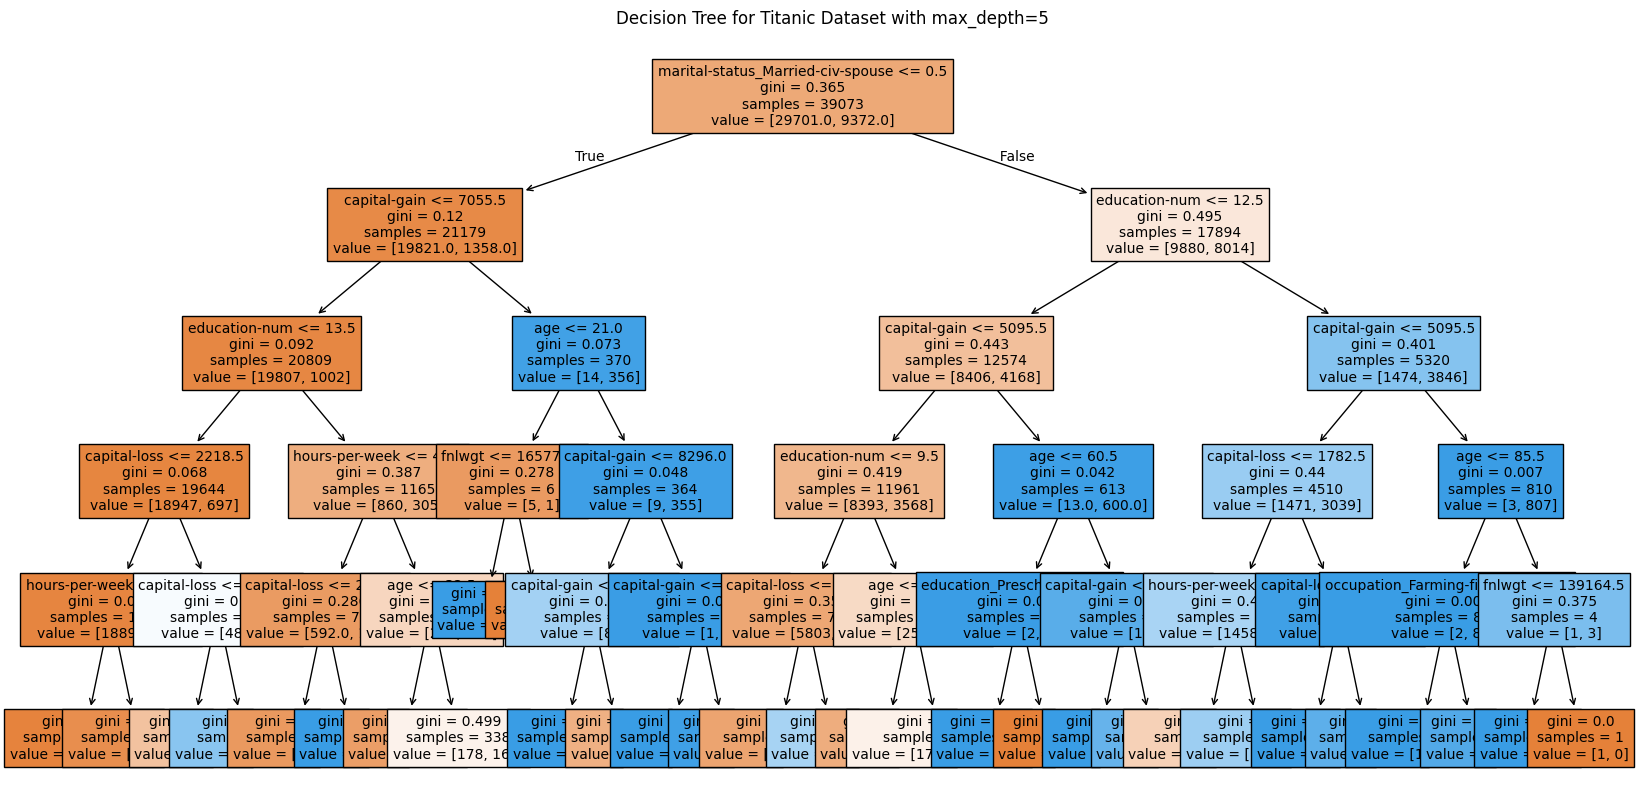

In [34]:
plt.figure(figsize=(20,10))
plot_tree(tree_census_v1, filled=True, feature_names=X_clean.columns, fontsize=10)
plt.title('Decision Tree for Titanic Dataset with max_depth=5')
plt.show()

In [35]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

<Figure size 1000x1000 with 0 Axes>

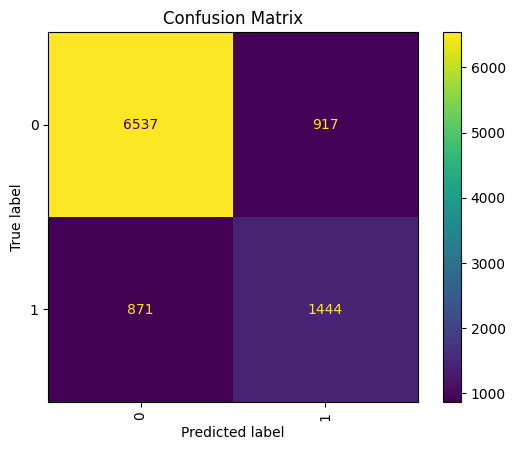

In [36]:
cm = confusion_matrix(y_test_census, y_pred_census)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
plt.figure(figsize=(10, 10))
disp.plot(xticks_rotation='vertical')
plt.title('Confusion Matrix')
plt.show()

## **Question 3 (5 points):**
## Create a sorted list of feature importances and comment on the top features.Are there a few that seem to be more important than the others?

## Plot your feature importances in a horizontal or vertical bar chart from most to least important. Label each bar with its feature importance rounded to the nearest integer (ie: 30%).

In [37]:
# Create a DataFrame of feature importances
importances_df = pd.DataFrame({
    'Feature': X_clean.columns,
    'Importance': tree_census.feature_importances_
})

# Sort in descending order
sorted_importances = importances_df.sort_values(by='Importance', ascending=False)

sorted_importances['Rounded %'] = (sorted_importances['Importance'] * 100).round().astype(int)

# Display top features
print(sorted_importances.head(10))


                              Feature  Importance  Rounded %
39  marital-status_Married-civ-spouse    0.200528         20
1                              fnlwgt    0.194619         19
2                       education-num    0.116083         12
0                                 age    0.111966         11
3                        capital-gain    0.103602         10
5                      hours-per-week    0.067535          7
4                        capital-loss    0.040002          4
12                  workclass_Private    0.010831          1
46         occupation_Exec-managerial    0.010177          1
45            occupation_Craft-repair    0.009785          1


The marital status and fnlwgt are the most important features to train our model on. Next, are education_num, age, and capital_gain.

In [38]:
import plotly.express as px

fig = px.bar(
    sorted_importances,
    x='Importance',
    y='Feature',
    orientation='h',
    text='Rounded %',  # display rounded % next to bar
    title='Feature Importances (Sorted)',
    height=600,
    width=800
)

# Clean layout and formatting
fig.update_traces(texttemplate='%{text}%', textposition='outside')
fig.update_layout(yaxis={'categoryorder': 'total ascending'})
fig.show()


## **Question 4 (5 points):**
## Write at least 5 sentences interpreting the results of your decision tree, confusion matrix, and feature importance visualizations.

## Is there any aspect of your results that you are uncertain or unsure of?

**My results show that my accuracy is 81%, precision is 61%, and recall score is 60%. From the confusion matrix, I can see that there are similar number of false positives and false negatives (around 900). From the Feature Importance graph (and list), we see that marital status, fnlwgt, education_num, and age are the 4 most important features for this model. Something I'm unsure of is the difference between education (feature) and education_num, and why there is a difference in the feature importance. Is it maybe because the education_num is ordinal in nature (numerical), and education has been one hot encoded (as it is a categorical variable)**

## **Question 5 (5 points):**
## Finally, we will create a new function to tune your decision tree to get more accurate and efficient results. Update your function to take in several new parameters with these default values:
* criterion_val ='gini'
* splitter_val ='best'
* max_depth_val = None
* min_samples_split_val = 2
* min_samples_leaf_val =1

## Pass your own variable into the decision tree by specifying what sklearn parameter you are trying to tune. This will simply be the parameter without the "_val" suffix.

## **For example, if your vanilla decision tree variable is called clf, you would adjust it like this:**
`clf = DecisionTreeClassifier(criterion=criterion_val, splitter=splitter_val, ...)`

In [39]:
tree_census=DecisionTreeClassifier(criterion='gini',splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1)
tree_census.fit(X_train_census, y_train_census)



DecisionTreeClassifier()

In [40]:
y_pred_census = tree_census.predict(X_test_census)
precision_census=precision_score(y_test_census, y_pred_census)
recall_census=recall_score(y_test_census, y_pred_census)
accuracy_census= accuracy_score(y_test_census, y_pred_census)



print("Precision:", precision_census)
print("Recall:", recall_census)
print("Accuracy:", accuracy_census)

Precision: 0.6025423728813559
Recall: 0.614254859611231
Accuracy: 0.8125703756781656


## **Question 6 (5 points):**

## Call your new function with either clean y variable at least 3 times. Each time, vary the values for all the parameters and examine its effects on your tree, confusion matrix, and metrics.

## You will likely want to look at documentation to see accepted values:  
###https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

## Why did you pick the values you did? What combination had the best effect on accuracy? Were you surprised by any of the results?

**Round 1**


In [41]:
tree_census=DecisionTreeClassifier(criterion='gini',splitter='random', max_depth=None, min_samples_split=3, min_samples_leaf=2)
tree_census.fit(X_train_census, y_train_census)



DecisionTreeClassifier(min_samples_leaf=2, min_samples_split=3,
                       splitter='random')

In [42]:
y_pred_census = tree_census.predict(X_test_census)
precision_census=precision_score(y_test_census, y_pred_census)
recall_census=recall_score(y_test_census, y_pred_census)
accuracy_census= accuracy_score(y_test_census, y_pred_census)



print("Precision:", precision_census)
print("Recall:", recall_census)
print("Accuracy:", accuracy_census)

Precision: 0.665948275862069
Recall: 0.5339092872570195
Accuracy: 0.8260825058859658


<Figure size 1000x1000 with 0 Axes>

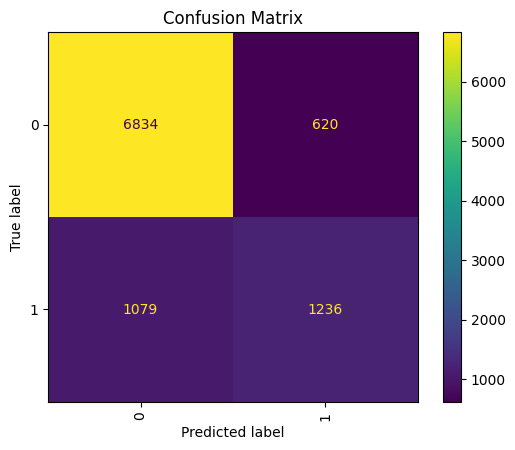

In [43]:
cm = confusion_matrix(y_test_census, y_pred_census)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
plt.figure(figsize=(10, 10))
disp.plot(xticks_rotation='vertical')
plt.title('Confusion Matrix')
plt.show()

**Round 2**

Precision: 0.79191128506197
Recall: 0.5244060475161987
Accuracy: 0.8546422356433616


<Figure size 1000x1000 with 0 Axes>

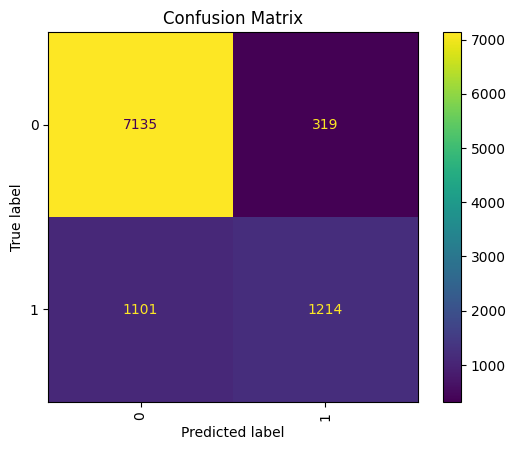

In [44]:
tree_census=DecisionTreeClassifier(criterion='entropy',splitter='best', max_depth=6, min_samples_split=4, min_samples_leaf=1)
tree_census.fit(X_train_census, y_train_census)

y_pred_census = tree_census.predict(X_test_census)
precision_census=precision_score(y_test_census, y_pred_census)
recall_census=recall_score(y_test_census, y_pred_census)
accuracy_census= accuracy_score(y_test_census, y_pred_census)



print("Precision:", precision_census)
print("Recall:", recall_census)
print("Accuracy:", accuracy_census)


cm = confusion_matrix(y_test_census, y_pred_census)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
plt.figure(figsize=(10, 10))
disp.plot(xticks_rotation='vertical')
plt.title('Confusion Matrix')
plt.show()

**Round 3**

Precision: 0.0
Recall: 0.0
Accuracy: 0.7630258982495649


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.



<Figure size 1000x1000 with 0 Axes>

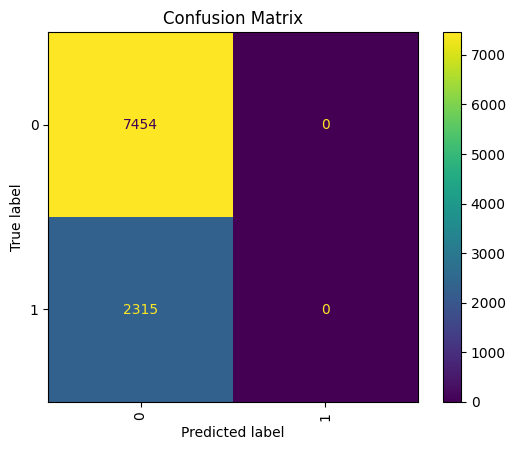

In [45]:
tree_census=DecisionTreeClassifier(criterion='gini',splitter='best', max_depth=10, min_samples_split=2, min_samples_leaf=0.7)
tree_census.fit(X_train_census, y_train_census)

y_pred_census = tree_census.predict(X_test_census)
precision_census=precision_score(y_test_census, y_pred_census)
recall_census=recall_score(y_test_census, y_pred_census)
accuracy_census= accuracy_score(y_test_census, y_pred_census)



print("Precision:", precision_census)
print("Recall:", recall_census)
print("Accuracy:", accuracy_census)


cm = confusion_matrix(y_test_census, y_pred_census)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
plt.figure(figsize=(10, 10))
disp.plot(xticks_rotation='vertical')
plt.title('Confusion Matrix')
plt.show()

I just looked at different combinations of parameter values apart from the default. I changed the criterion, max_depth, splitter, min_samples_split. Even looked at float values for the min_samples_leaf.

I had the best accuracy of around 85% when I had these values for my parameters
(criterion='entropy',splitter='best', max_depth=6, min_samples_split=4, min_samples_leaf=1)

I was suprised to see that my precision and recall both went to 0 when I had my min_samples_leaf as 0.7

# **Part 3: Random Forest and Ensembling Evaluation (40 Points)**

## For Parts 3 and 4, you may pick *your own dataset* or continue with the census data.

## Like above, you will want to reference the documentation as necessary:
### https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html


## **Data**
## Use this space to load and call your data for Parts 3 and 4. You are welcome to use your final project data for these sections.

In [46]:
#will be using the same dataset as before, census data

## **Question 1 (10 points):**

## Write a function to take in a feature variable (X) and a target variable (y). Create a train test split for the variables.

## Finally, instantiate, fit, and predict using **both** a single Decision Tree and a Random Forest classifier. Print the accuracy, precision, and recall for both models.

## Call your function and describe your baseline results.


In [47]:

# Splitting the dataset
X_train_census, X_test_census, y_train_census, y_test_census = train_test_split(X_clean, y_clean_binary, test_size=0.2, random_state=3001) # use the train_test_split to split data into train and test sets, X is the features I'll use, y is the feature I'll predict

In [48]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train_census, y_train_census)
dt_pred = dt.predict(X_test_census)
dt_accuracy_base= accuracy_score(y_test_census, dt_pred)
dt_precision_base=precision_score(y_test_census, dt_pred)
dt_recall_base=recall_score(y_test_census, dt_pred)
print(f"Decision Tree Accuracy: {dt_accuracy_base:.2f}")
print(f"Decision Tree Precision: {dt_precision_base:.2f}")
print(f"Decision Tree Recall: {dt_recall_base:.2f}")

Decision Tree Accuracy: 0.81
Decision Tree Precision: 0.61
Decision Tree Recall: 0.62


In [49]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_census, y_train_census)
rf_pred = rf.predict(X_test_census)
rf_accuracy_base = accuracy_score(y_test_census, rf_pred)
rf_precision_base = precision_score(y_test_census, rf_pred)
rf_recall_base = recall_score(y_test_census, rf_pred)
print(f"Random Forest Accuracy: {rf_accuracy_base:.2f}")
print(f"Random Forest Precision: {rf_precision_base:.2f}")
print(f"Random Forest Recall: {rf_recall_base:.2f}")

Random Forest Accuracy: 0.85
Random Forest Precision: 0.71
Random Forest Recall: 0.61


The random forest model has better accuracy and precision than the decision tree, but the recall is the same for both of the models (saved it in variables).



## **Question 2 (30 points):**
## This question will ask you to tune Random Forest classifiers and preprocess your data in *any number of ways* to achieve the *best possible results you can*.

## Train one vanilla Decision Forest model and one vanilla Random Forest model and store their accuracies in variables so you can use them as baselines.

## Then, using functions or not, spend some time tuning at least 10 (or more) Random Forest models. Store your accuracies in a list or array and print your maximum accuracy.

# **Go crazy - feel free to implement sampling, dropping features, preprocessing, new parameters, whatever might boost your accuracy.**

# **The top 5 best accuracies in the class will get +15 on their individual lab grade!**

In [50]:
def evaluate_random_forest(X_train, X_test, y_train, y_test,criterion='gini',
                           n_estimators=100, max_depth=None,
                           max_features='sqrt', min_samples_split=2,
                           random_state=42, verbose=True):

    # Create model with passed hyperparameters
    rf = RandomForestClassifier(criterion=criterion,
        n_estimators=n_estimators,
        max_depth=max_depth,
        max_features=max_features,
        min_samples_split=min_samples_split,
        random_state=random_state
    )

    # Fit and predict
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)

    # Metrics
    acc = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)

    if verbose:
        print(f"Accuracy: {acc:.4f}")
        print(f"Precision: {precision:.2f}")
        print(f"Recall: {recall:.2f}")

    return acc, precision, recall

In [51]:
evaluate_random_forest(X_train_census, X_test_census, y_train_census, y_test_census,criterion='entropy')#round 1

Accuracy: 0.8513
Precision: 0.72
Recall: 0.62


(0.8512642030914116, 0.7157157157157157, 0.6177105831533477)

In [52]:
evaluate_random_forest(X_train_census, X_test_census, y_train_census, y_test_census, min_samples_split=3, max_features='log2') #round 2

Accuracy: 0.8516
Precision: 0.72
Recall: 0.62


(0.8515712969597707, 0.7172275238573581, 0.6168466522678185)

In [53]:
evaluate_random_forest(X_train_census, X_test_census, y_train_census, y_test_census, min_samples_split=0.5, max_features='sqrt') #round 3

Accuracy: 0.7630
Precision: 0.00
Recall: 0.00


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.



(0.7630258982495649, 0.0, 0.0)

In [54]:
evaluate_random_forest(X_train_census, X_test_census, y_train_census, y_test_census,n_estimators=200, min_samples_split=2, max_features=None) #round 4

Accuracy: 0.8510
Precision: 0.72
Recall: 0.61


(0.8509571092230526, 0.7170288024254674, 0.6129589632829374)

In [55]:
evaluate_random_forest(X_train_census, X_test_census, y_train_census, y_test_census,n_estimators=150, min_samples_split=2,random_state=70) #round 5

Accuracy: 0.8508
Precision: 0.71
Recall: 0.62


(0.8507523799774798, 0.713290194126431, 0.6190064794816414)

changing the model, by only keeping the top 10 most important features (which made accuracy worse, so will just use the original model)

**Round 6**



In [56]:
# 1. Get feature importances from the trained model
import pandas as pd

importance_df = pd.DataFrame({
    'Feature': X_clean.columns,
    'Importance': tree_census.feature_importances_
})

# 2. Sort and select top 10 features
top_features = importance_df.sort_values(by='Importance', ascending=False)['Feature'].head(10).tolist()
print("Top 10 Features:", top_features)

# 3. Create new feature DataFrame with only top 10
X_top10 = X_clean[top_features]

# 4. Split the data
from sklearn.model_selection import train_test_split

X_train_top10, X_test_top10, y_train_top10, y_test_top10 = train_test_split(
    X_top10, y_clean_binary, test_size=0.2, random_state=42
)

# 5. Evaluate using your earlier RF evaluation function
evaluate_random_forest(X_train_top10, X_test_top10, y_train_top10, y_test_top10)


Top 10 Features: ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week', 'race_Asian-Pac-Islander', 'race_Black', 'race_Other', 'race_White']
Accuracy: 0.8116
Precision: 0.64
Recall: 0.51


(0.8116490940730884, 0.6355976829910479, 0.5125265392781316)

In [57]:
evaluate_random_forest(X_train_census, X_test_census, y_train_census, y_test_census,criterion='gini', max_depth=10)#Round 7

Accuracy: 0.8552
Precision: 0.78
Recall: 0.54


(0.8551540587572934, 0.7798507462686567, 0.5416846652267818)

In [58]:
evaluate_random_forest(X_train_census, X_test_census, y_train_census, y_test_census,criterion='gini', max_depth=20)#Round 8

Accuracy: 0.8597
Precision: 0.77
Recall: 0.58


(0.8596581021598936, 0.7740998838559814, 0.5758099352051835)

In [59]:
evaluate_random_forest(X_train_census, X_test_census, y_train_census, y_test_census,criterion='gini', max_depth=25)#Round 9

Accuracy: 0.8596
Precision: 0.76
Recall: 0.59


(0.8595557375371071, 0.7620900500277932, 0.5922246220302376)

In [60]:
evaluate_random_forest(X_train_census, X_test_census, y_train_census, y_test_census,criterion='gini',n_estimators=90, max_depth=25, min_samples_split=2)#Round 10

Accuracy: 0.8601
Precision: 0.76
Recall: 0.60


(0.860067560651039, 0.7618784530386741, 0.5956803455723542)

In [61]:
evaluate_random_forest(X_train_census, X_test_census, y_train_census, y_test_census, criterion='gini', n_estimators=90, max_depth=25, min_samples_split=2, max_features=None)#Round 11

Accuracy: 0.8564
Precision: 0.74
Recall: 0.61


(0.8563824342307299, 0.7387434554973822, 0.6095032397408208)

In [62]:
evaluate_random_forest(X_train_census, X_test_census, y_train_census, y_test_census, criterion='log_loss', n_estimators=90, max_depth=25, min_samples_split=2)#Round 12

Accuracy: 0.8604
Precision: 0.77
Recall: 0.59


(0.8603746545193981, 0.7660884163402351, 0.5913606911447085)

In [63]:
evaluate_random_forest(X_train_census, X_test_census, y_train_census, y_test_census, criterion='gini', n_estimators=90, max_depth=25, min_samples_split=2, random_state=1000)#Round 13, best till now

Accuracy: 0.8610
Precision: 0.76
Recall: 0.60


(0.8609888422561163, 0.7621917808219179, 0.6008639308855291)

**Best accuracy I got is 86.13%**

# **Part 4: Ensemble Model Interpretation and Reflection (15 Points)**


## **Question 1 (5 points):**
## Create a plot that summarizes the results of your experiments and how they compare to the results of your baseline Decision Tree and Random Forest model.

## You may visualize your results in any type of plot you see fit. Color code your visual in some way so that models that did better than the baseline Random Forest are distinguished from models that did worse.

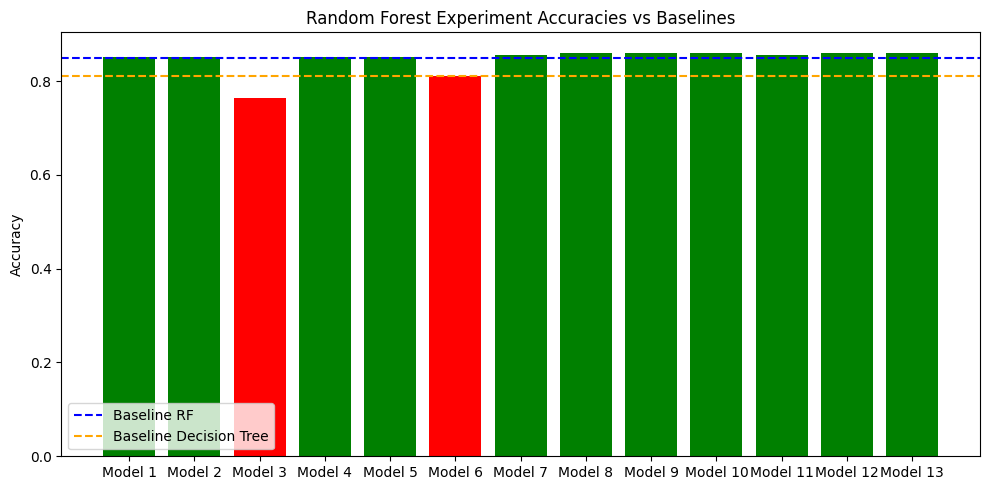

In [64]:
import matplotlib.pyplot as plt

rf_accuracies = [0.8513, 0.8516, 0.7630, 0.8510, 0.8508, 0.8116, 0.8552, 0.8597, 0.8596, 0.8601, 0.8564, 0.8604, 0.8610]  # manually wrote my accuracies here
baseline_rf_accuracy = 0.85
baseline_dt_accuracy = 0.81

# Assign colors
colors = ['green' if acc > baseline_rf_accuracy else 'red' for acc in rf_accuracies]

# Plot
plt.figure(figsize=(10, 5))
plt.bar(range(len(rf_accuracies)), rf_accuracies, color=colors)
plt.axhline(baseline_rf_accuracy, color='blue', linestyle='--', label='Baseline RF')
plt.axhline(baseline_dt_accuracy, color='orange', linestyle='--', label='Baseline Decision Tree')

# Labels
plt.xticks(range(len(rf_accuracies)), [f'Model {i+1}' for i in range(len(rf_accuracies))])
plt.ylabel("Accuracy")
plt.title("Random Forest Experiment Accuracies vs Baselines")
plt.legend()
plt.tight_layout()
plt.show()


The green bars have a higher accuracy than the baseline random forest accuracy, while the red ones have a lower accuracy. Also if the bars are over the yellow dotted line, they have a higher accuracy than the baseline decision tree accuracy.

## **Question 2 (5 points):**
## Write 10 or more sentences on what parameters had the biggest effect or did not seem to effect your results. Did any parameter choices make your results worse than your vanilla model?

**The parameters I chose to make changes to are criterion, number of estimators, max_depth, max_features, min_samples_split, and random_state. Using entropy instead of gini led to a worse accuracy. Using log_loss also had a similar accuracy to 'entropy'. Having 90 as number of estimators optimized the accuracy (figured that out by playing around with the value). I changed the max depth around from 10 all the way to 25, which I found to be the optimal value, using that in my final model. Min_samples_split was ideal when it was kept its default value of 2. In fact, when I chose a float value less than 1, the accuracy significantly dropped, even below the baseline decision tree accuracy level. I also played around with the random_state, but couldnt really figure out any big difference.**

## **Question 3 (5 points):**
## Write 10 or more sentences reflecting on the tuning process.

## What kind of approach did you take? Was it random combinations or more structured? Did you change your approach after seeing your initial results?

## What kind of strategies in preprocessing and picking parameters (ie: brute forcing parameters, testing various values in a range) do you think would get some of the best scores in the class?

**My approach to tuning was, honestly, not the best. I think I was changing one hyperparameter at a time, trying to optimize the value. But I wasn't looking at the interactions between these variables (shoutout SYS 3034). Once I found the best value for that hyperparamter, I'd move to the next hyperparameter. I also dropped a couple features to see if that had any effect on the accuracy. I chose the top 10 most important features, but that worsened my accuracy (contrary to what I thought). I think maybe cleaning the data in a better way than what I did will get some of the best scores in the class and also looking at interactions between the hyperparameters might be the strategy to optimize accuracy of the tuned random forest model.**

### Honor Pledge

On my honor as a student, I have neither given nor received unauthorized aid on this assignment.
Atharv Gupta